Blah blah blah

The goal here is to use the [MotionClouds](https://github.com/NeuralEnsemble/MotionClouds) library to generate figures with second-order contours, similar to those used in the [P. Roelfsema's group](https://nin.nl/research/researchgroups/roelfsema-group/).

<!-- TEASER_END -->

Let's first initialize the notebook:

In [1]:
from __future__ import division, print_function
import numpy as np
np.set_printoptions(precision=6, suppress=True)
%matplotlib inline
import matplotlib.pyplot as plt
fig_width = 10
figsize = (fig_width, fig_width)


## install and load the library

In [2]:
%pip install MotionClouds

Note: you may need to restart the kernel to use updated packages.


In [3]:
import MotionClouds as mc
mc.N_frame = 1
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)
name = 'texture'
env = mc.envelope_gabor(fx, fy, ft, theta=np.pi/4, V_X=0., V_Y=0., B_V=0)
z = mc.rectif(mc.random_cloud(env))
image = z.reshape((mc.N_X, mc.N_Y))

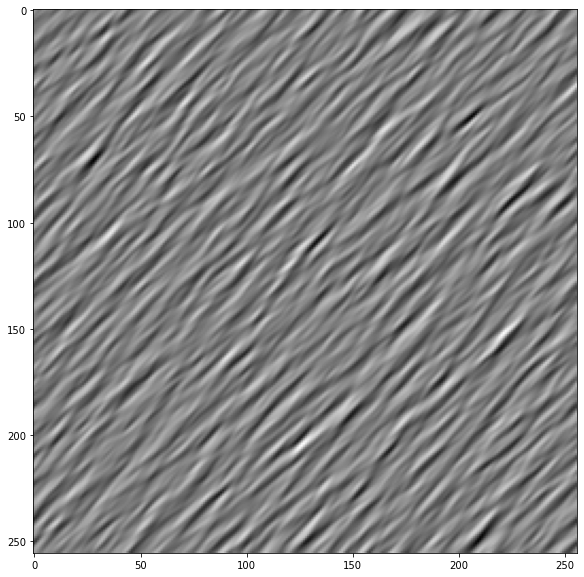

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(image, cmap=plt.gray())

## define a crop function

The library has a representation of space that we may take advantage of:

-0.5 0.49609375


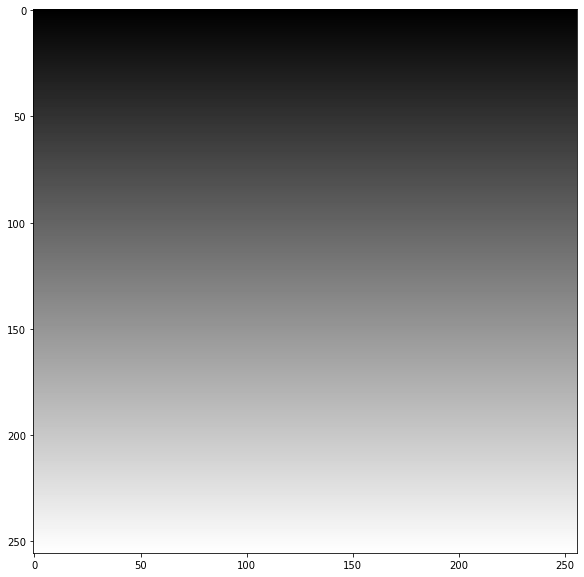

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(fx, cmap=plt.gray())
print(fx.min(), fx.max())

We may easily define a central cropping mask:

False True


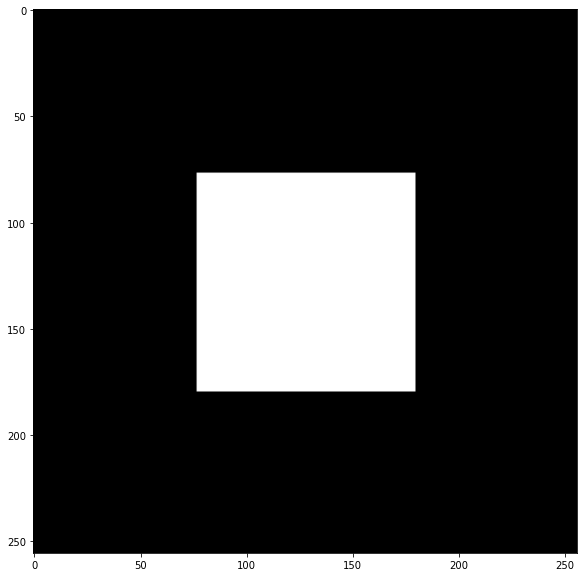

In [6]:
rho = .2 
mask = (np.abs(fx) < rho) * (np.abs(fy) < rho)
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(mask, cmap=plt.gray())
print(mask.min(), mask.max())

From this we define a cropping function

In [7]:
def crop_and_merge(image, rho=.2, use_flip=True):
    N_X, N_Y = image.shape
    fx, fy, ft = mc.get_grids(N_X, N_Y, 1)

    image_fig = image.copy()
    if use_flip: image_fig = np.fliplr(image_fig)
    image_fig = np.roll(image_fig, N_X//4 + int(N_X//2*np.random.rand()), axis=0 ) # roll over one axis
    image_fig = np.roll(image_fig, N_Y//4 + int(N_Y//2*np.random.rand()), axis=1 ) # roll over one axis    
    mask = (np.abs(fx[:, :, 0]) < rho) * (np.abs(fy[:, :, 0]) < rho)
    
    return image * (1-mask) + image_fig * mask


## usage

With a flip

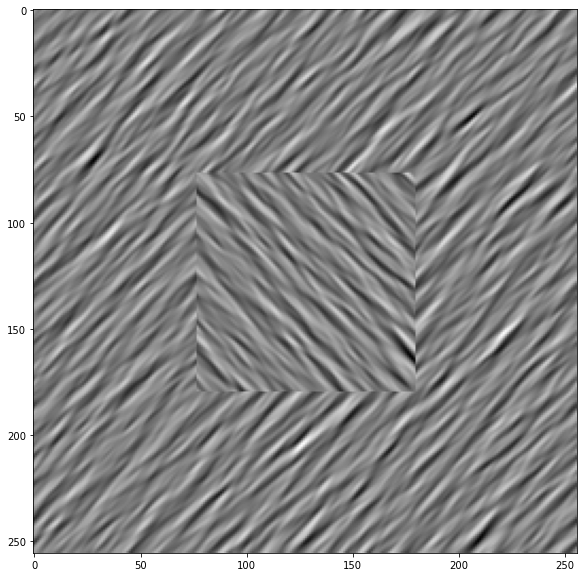

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(crop_and_merge(image, rho=.2, use_flip=True), cmap=plt.gray())


and without:

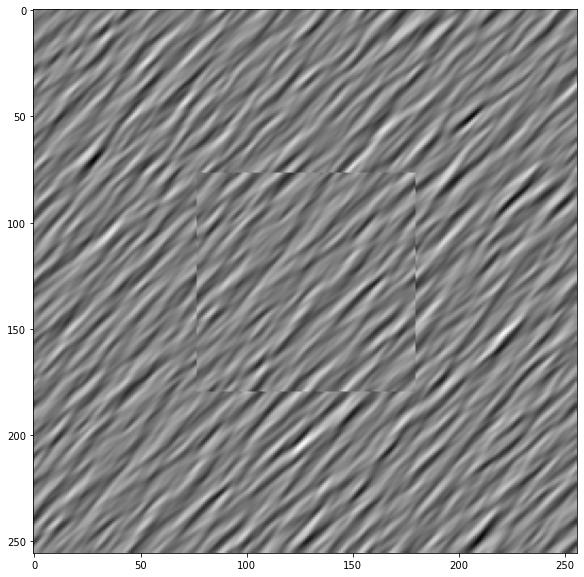

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(crop_and_merge(image, rho=.2, use_flip=False), cmap=plt.gray())

## some book keeping for the notebook

In [10]:
%pip install watermark

Note: you may need to restart the kernel to use updated packages.


In [11]:
%load_ext watermark
%watermark -i -h -m -v -p numpy,MotionClouds,matplotlib  -r -g -b

Python implementation: CPython
Python version       : 3.9.1
IPython version      : 7.19.0

numpy       : 1.19.4
MotionClouds: 20200212
matplotlib  : 3.3.2

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 36
Architecture: 64bit

Hostname: fortytwo

Git hash: 419c53f832cf4f540f04123bfbfdac74b6d3336e

Git repo: https://github.com/laurentperrinet/sciblog.git

Git branch: master

